In [1]:
#importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing day csv file
boombikes=pd.read_csv(r"C:\Users\home\Downloads\day.csv")
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# understanding the data
print(boombikes.shape)
boombikes.info()

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#Analysing numeric variable stats
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Dropping the variables that are not required to analyze the total number of bike rentals.
boombikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
boombikes.shape

(730, 12)

In [6]:
# Checking the different variables and converting categorical variables to meaningful names 

# For season variable
mapping1={'season':{1:'spring', 2:'summer', 3:'fall', 4:'winter'}}
boombikes.replace(mapping1,inplace=True)

# For yr variable
mapping2={'yr':{0:2018, 1:2019}}
boombikes.replace(mapping2,inplace=True)

# For mnth variable
mapping3={'mnth':{1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}}
boombikes.replace(mapping3,inplace=True)

# For Weekday variable
mapping4={'weekday':{0:'sun', 1:'mon', 2:'tues', 3:'wed',4:'thurs',5:'fri',6:'sat'}}
boombikes.replace(mapping4,inplace=True)

# For weathersit variable
mapping5={'weathersit':{1:'Clear',
                        2:'Mist',
                        3:'Light Snow', 
                        4:'Heavy Rain'}}
boombikes.replace(mapping5,inplace=True)

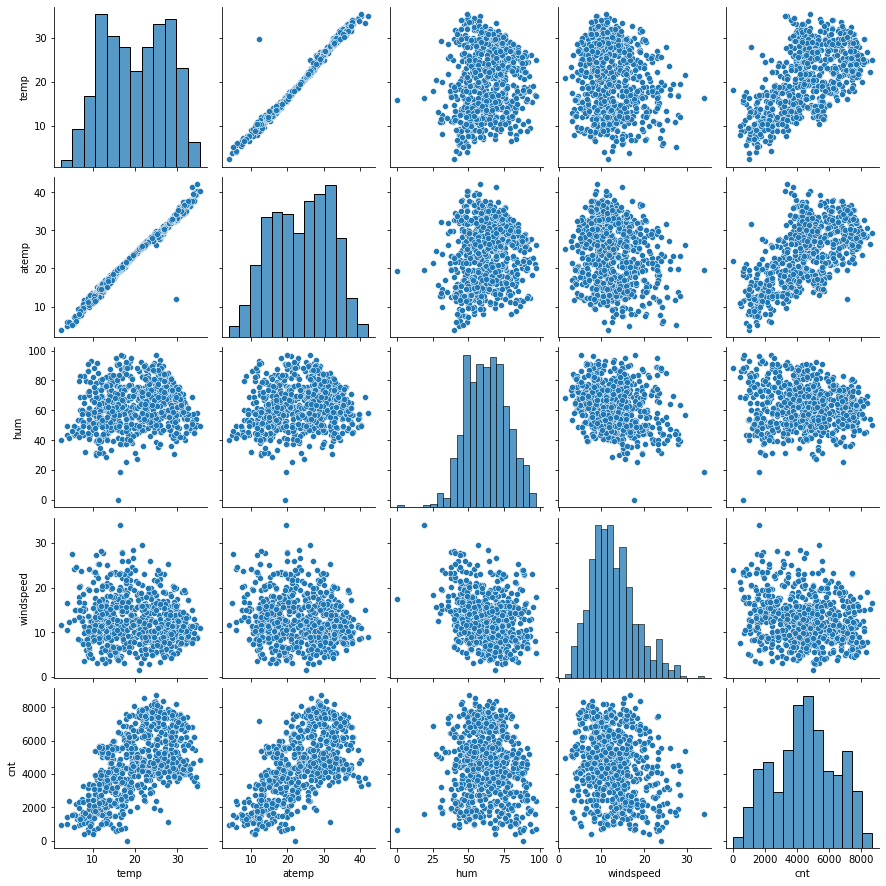

In [7]:
# Visualizing numeric column data to see the relationship between target variable and other independent variables (so that it can be figured out if linear regression model indeed works here or not
# and so we have to see atleast some variables should follow linear relationship with target variable ) and to check
#multicollinearity

sns.pairplot(boombikes[['temp','atemp','hum','windspeed','cnt']])
plt.show()

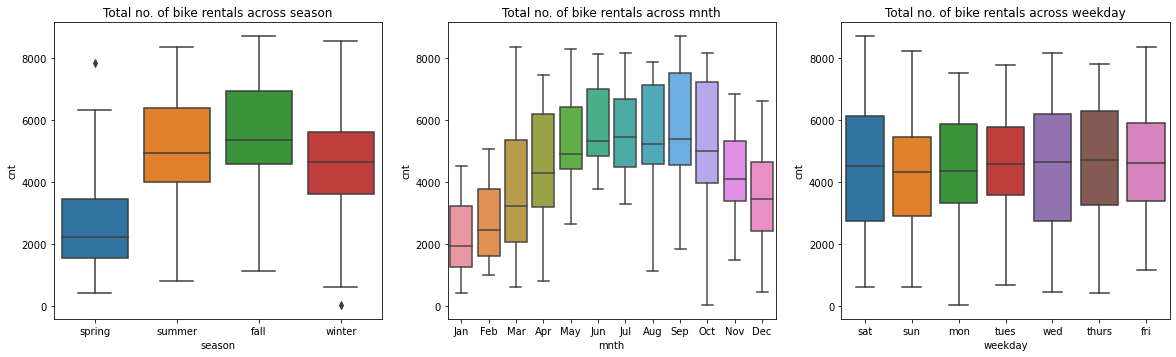

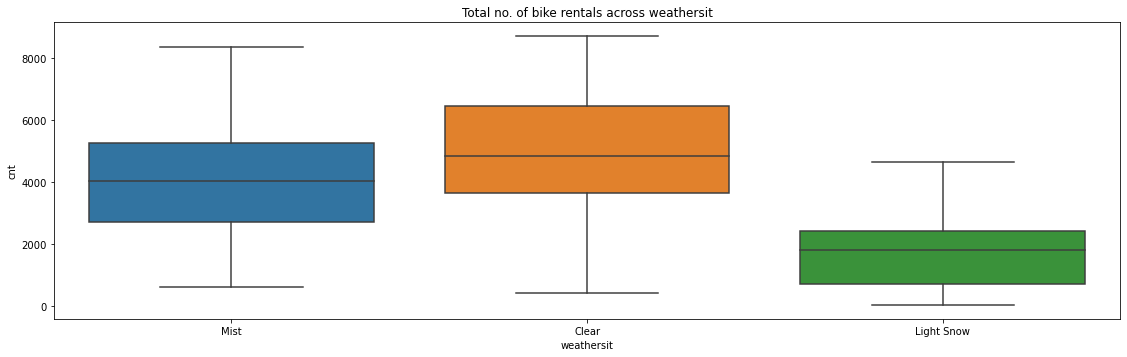

In [8]:
#Visualizing categorical variables 
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=boombikes)
plt.title('Total no. of bike rentals across season')

plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt',data=boombikes)
plt.title('Total no. of bike rentals across mnth')

plt.subplot(2,3,3)
sns.boxplot(x='weekday',y='cnt',data=boombikes)
plt.title('Total no. of bike rentals across weekday')

plt.figure(figsize=(65,12))
plt.subplot(2,3,4)
sns.boxplot(x='weathersit',y='cnt',data=boombikes)
plt.title('Total no. of bike rentals across weathersit')
plt.show()

In [9]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


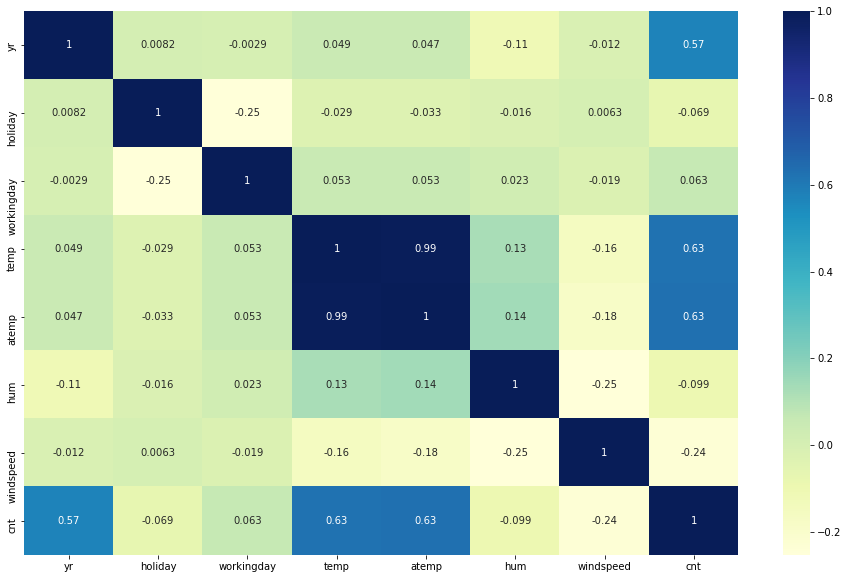

In [10]:
# Checking the corelation betweeen different variables and dropping the ones highly coorelated
#plotting a heatmap
plt.figure(figsize=(16,10))
sns.heatmap(boombikes.corr(),annot= True,cmap='YlGnBu')
plt.show()

# We can see atemp and temp are highly coorelated,hence dropping temp variable
boombikes.drop('atemp',axis=1,inplace=True)

# It is seen cnt is quite coorelated with temp

In [11]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


# Encoding the categorical variables to dummy variables for Modelling


In [12]:
#Getting dummies for categorical variables like season,mnth,weekday,weathersit
status1=pd.get_dummies(boombikes.season,drop_first=True)
status2=pd.get_dummies(boombikes.mnth,drop_first=True)
status3=pd.get_dummies(boombikes.weekday,drop_first=True)
status4=pd.get_dummies(boombikes.weathersit,drop_first=True)

In [13]:
#concating the dummies with the original dataframe
boombikes=pd.concat([boombikes,status1,status2,status3,status4],axis=1)
boombikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,mon,sat,sun,thurs,tues,wed,Light Snow,Mist
0,spring,2018,Jan,0,sat,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,2018,Jan,0,sun,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,2018,Jan,0,mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,2018,Jan,0,tues,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,2018,Jan,0,wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,thurs,1,Mist,10.420847,65.2917,23.458911,...,0,0,0,0,0,1,0,0,0,1
726,spring,2019,Dec,0,fri,1,Mist,10.386653,59.0000,10.416557,...,0,0,0,0,0,0,0,0,0,1
727,spring,2019,Dec,0,sat,0,Mist,10.386653,75.2917,8.333661,...,0,0,0,1,0,0,0,0,0,1
728,spring,2019,Dec,0,sun,0,Clear,10.489153,48.3333,23.500518,...,0,0,0,0,1,0,0,0,0,0


In [14]:
#Drooping the redundant variables like season,mnth,weekday,weathersit as we have created dummy variables for them.
boombikes.drop(['season','mnth','weekday','weathersit'],inplace=True,axis=1)

In [15]:
boombikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,mon,sat,sun,thurs,tues,wed,Light Snow,Mist
0,2018,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2018,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Splitting the Data into train and test

In [16]:
# Splitting the data into train and test
boombikes_train,boombikes_test =train_test_split(boombikes,train_size=0.8,random_state=100)
print(boombikes_train.shape)
print(boombikes_test.shape)

(584, 29)
(146, 29)


# Scaling the data using Min Max Scaling

In [17]:
#instantiate the object of MinMaxScaler class
scaler=MinMaxScaler()

#create a list of numeric variables to be scaled
num_vars=['temp','windspeed','hum','cnt']

# fit on training data for num vars only
boombikes_train[num_vars]=scaler.fit_transform(boombikes_train[num_vars])

# Analyzing the training data after Scaling
boombikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,mon,sat,sun,thurs,tues,wed,Light Snow,Mist
367,2019,0,1,0.113228,0.454701,0.695175,0.254717,1,0,0,...,0,0,0,0,0,0,1,0,0,0
648,2019,0,1,0.468352,0.477458,0.299450,0.868385,0,0,1,...,1,0,0,0,0,1,0,0,0,0
44,2018,0,1,0.443431,0.387290,0.807474,0.217556,1,0,0,...,0,0,1,0,0,0,0,0,0,0
705,2019,0,1,0.326094,0.787463,0.189819,0.573631,0,0,1,...,0,0,0,0,0,0,0,0,0,1
379,2019,0,0,0.133996,0.431945,0.449210,0.263346,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Building the model using RFE

<AxesSubplot:>

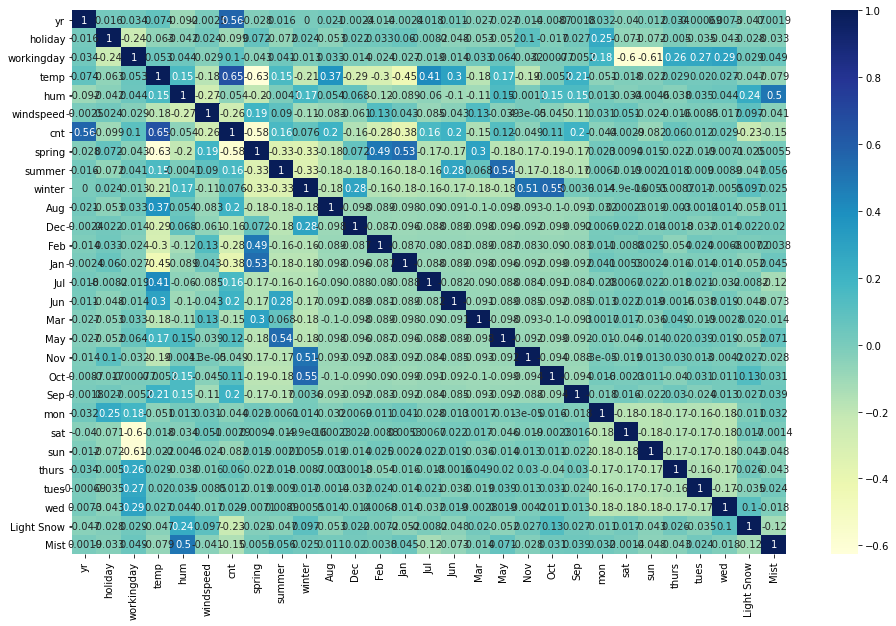

In [18]:
#analyzing the heat map
plt.figure(figsize=(16,10))
sns.heatmap(boombikes_train.corr(),annot= True,cmap='YlGnBu')

In [19]:
# Defining X_train and y_train
y_train=boombikes_train.pop('cnt')
X_train=boombikes_train

In [20]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)        
rfe = rfe.fit(X_train, y_train)

In [21]:
#Getting the data as required from rfe
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', False, 2),
 ('mon', False, 6),
 ('sat', True, 1),
 ('sun', False, 5),
 ('thurs', False, 12),
 ('tues', False, 7),
 ('wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [22]:
# Fetching the top 15 variables picked using RFE model
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'sat', 'Light Snow', 'Mist'],
      dtype='object')

In [23]:
# Variables which can be discared using RFE model
X_train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Sep', 'mon', 'sun',
       'thurs', 'tues', 'wed'],
      dtype='object')

# Building the model using selected columns by RFE

In [24]:
X_train_rfe = X_train[col]

In [25]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [26]:
#create and fit the model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [27]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.02e-223
Time:                        22:40:09   Log-Likelihood:                 598.33
No. Observations:                 584   AIC:                            -1165.
Df Residuals:                     568   BIC:                            -1095.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -461.6298     14.966    -30.846      0.0

In [28]:
# Based on the p value, find the significance 
# supplement with VIF
# Creating a Dataframe that will contain the names of all the feature variables and their respective VIF value
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,16862252.53
4,temp,3.56
7,spring,2.85
8,winter,2.19
5,hum,1.95
3,workingday,1.79
13,sat,1.70
12,Nov,1.62
15,Mist,1.61
10,Jan,1.60


In [29]:
# Dropping column holiday as it has high p value
X_train_rfe= X_train_rfe.drop('holiday',axis=1)

# build a model with all the variables
X_train_sm= sm.add_constant(X_train_rfe)

#create the revised Model
lr= sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

# See the coefficients
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.59e-224
Time:                        22:40:09   Log-Likelihood:                 596.66
No. Observations:                 584   AIC:                            -1163.
Df Residuals:                     569   BIC:                            -1098.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -461.2404     14.994    -30.762      0.000    -490.690    -431.791
yr             0.2287      0.007     30.792      0.000       0.214       0.243
workingday     0.0574      0.010      5.889      0.000       0.038       0.077
temp           0.4430      0.031     14.493      0.000       0.383       0.503
hum           -0.1283      0.035     -3.629      0.000      -0.198      -0.059
windspeed     -0.1847      0.024     -7.787      0.000      -0.231      -0.138
spring        -0.1120      0.014     -7.898      0.000      -0.140      -0.084
winter         0.0817      0.012      6.548      0.000       0.057       0.106
Dec           -0.0620      0.015     -4.037      0.000      -0.092      -0.032
Jan           -0.0513      0.016     -3.139      0.002      -0.083      -0.019
Jul           -0.0783      0.016     -4.996      0.000      -0.109      -0.048
Nov           -0.0722      0.017     -4.254      0.000      -0.106      -0.039
sat            0.0678      0.013      5.290      0.000       0.043       0.093
Light Snow    -0.2634      0.025    -10.513      0.000      -0.313      -0.214
Mist          -0.0598      0.010     -6.132      0.000      -0.079      -0.041
==============================================================================
Omnibus:                      100.725   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.825
Skew:                          -0.823   Prob(JB):                     2.88e-66
Kurtosis:                       6.113   Cond. No.                     8.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Checking the VIF again
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,16858751.68
3,temp,3.55
6,spring,2.84
7,winter,2.19
4,hum,1.94
14,Mist,1.61
9,Jan,1.60
11,Nov,1.60
2,workingday,1.58
12,sat,1.57


In [31]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Residual Analysis

In [32]:
# Residual Analysis
y_train_pred = lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

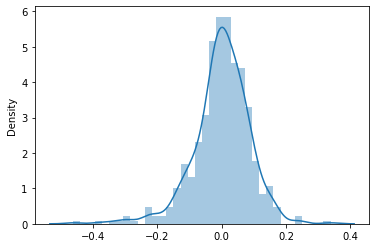

In [34]:
# plotting the histogram forerror terms
# This can be seen it is centered around 0
res=y_train-y_train_pred
sns.distplot(res)

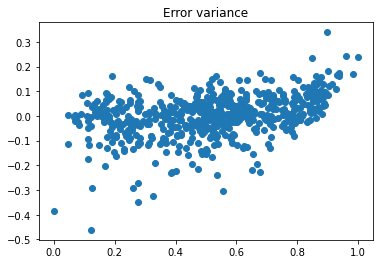

In [35]:
#look for patterns in residuals(we shouldn't be able to identify any patterns)
plt.scatter(y_train,res)
plt.title('Error variance')
plt.show()

In [36]:
# scaling the numeric columns on test data
#fit on training data for num vars only
boombikes_test[num_vars]=scaler.transform(boombikes_test[num_vars])
boombikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,mon,sat,sun,thurs,tues,wed,Light Snow,Mist
184,2018,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,2019,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,2018,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,2018,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,2018,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
# Getting X_test and y_test
y_test=boombikes_test.pop('cnt')
X_test=boombikes_test

In [38]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test_rfe
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [39]:
# Making predictions
y_test_pred = lr_model.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

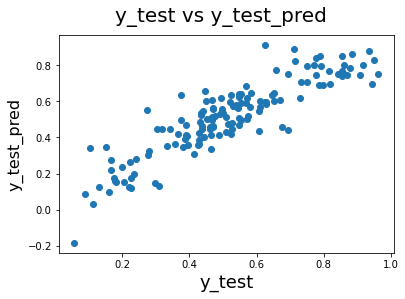

In [40]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)    

In [41]:
# Evaluate r2 squared for test and train data
test_r_squared=(r2_score(y_true=y_test,y_pred=y_test_pred))
train_r_squared=(r2_score(y_true=y_train,y_pred=y_train_pred))
print("test_r_squared: ",test_r_squared)
print("train_r_squared: ",train_r_squared)

test_r_squared:  0.7840827509028372
train_r_squared:  0.8503119159533723
